# 2. Transfer Learning

# Part 1:

## Loading and pre-processing an image
We can load the image using any library such as OpenCV, PIL, skimage etc. We perform the following steps on an input image:

<ul>
<li>Load the image. This is done using the load_img() function. Keras uses the PIL format for loading images. Thus, the image is in width x height x channels format.</li>
<li>Convert the image from PIL format to Numpy format using img_to_array() function.</li>
<li>The networks accept a 4-dimensional Tensor as an input of the form ( batchsize, height, width, channels). This is done using the expand_dims() function in Numpy.</li>
<li>
Preprocess the input by subtracting the mean value from each channel of the images in the batch. Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet. The values for ImageNet are : [ 103.939, 116.779, 123.68 ]. This is done using the preprocess_input() function in Keras.
</li>
<li>
Get the classification result, which is a Tensor of dimension ( batch size x 1000 ). This is done by model.predict() function.
</li>

<li>
Convert the result to human-readable labels. This is done by decode_predictions.
</li>
</ul>

In [30]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

## Extracing weights & biases of VGG-16 from Keras

In [31]:
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()

553476096/553467096 [==============================] - 4s 0us/step


In [32]:
model.save('./VGG16_Weights_Biases.h5')

## Part 2: VGG-16 Implementation

In [33]:
model = Sequential()
model.add(Convolution2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Convolution2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name='vgg16'))
model.add(Flatten(name='flatten'))
model.add(Dense(4096, activation='relu', name='fc1'))
model.add(Dense(4096, activation='relu', name='fc2'))
model.add(Dense(1000, activation='sigmoid', name='output'))

In [34]:
model.load_weights('VGG16_Weights_Biases.h5')

## Predicting labels from 3 sample images
The VGG-16 model predicted all of these images correctly.

### Image 1: Coffee Mug

In [35]:
def preprocess_image_for_vgg16(image) :
  # Convert the image pixels to a numpy array
  image = img_to_array(image)

  # Reshape data for the model
  image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
  
  # Prepare the image for the VGG model
  image = preprocess_input(image)
  return image

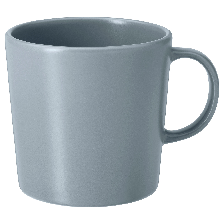

In [36]:
sample_mug = load_img('sample_mug.jpg', target_size=(224, 224))
sample_mug

In [37]:
sample_mug = preprocess_image_for_vgg16(sample_mug)

In [38]:
# Predict the probability across all output classes
yhat = model.predict(sample_mug)
# Convert the probabilities to class labels
label = decode_predictions(yhat)
# Retrieve the most likely result, e.g. highest probability
label = label[0][0]
# Print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

49152/35363 [=========================================] - 0s 0us/step
coffee_mug (100.00%)


### Image 2: Golden Retriever

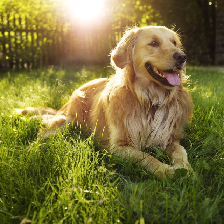

In [39]:
sample_dog = load_img('golden-retriever-royalty-free-image-506756303-1560962726.jpg', target_size=(224, 224))
sample_dog

In [40]:
sample_dog = preprocess_image_for_vgg16(sample_dog)

In [41]:
# Predict the probability across all output classes
yhat = model.predict(sample_dog)
# Convert the probabilities to class labels
label = decode_predictions(yhat)
# Retrieve the most likely result, e.g. highest probability
label = label[0][0]
# Print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

golden_retriever (100.00%)


### Image 3: Rooster

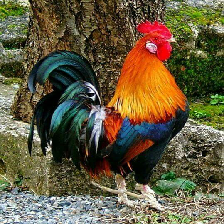

In [42]:
sample_rooster = load_img('Rooster.jpg', target_size=(224, 224))
sample_rooster

In [43]:
sample_rooster = preprocess_image_for_vgg16(sample_rooster)

In [44]:
# Predict the probability across all output classes
yhat = model.predict(sample_rooster)
# Convert the probabilities to class labels
label = decode_predictions(yhat)
# Retrieve the most likely result, e.g. highest probability
label = label[0][0]
# Print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

cock (100.00%)


# Part 3

## What types of image does VGG-16 classify?
The VGG16 model achieved 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to **1000 classes**. For example the model can predict these classes: (You can find the labels that VGG-16 can predict from <a href="https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a">here</a>)

<ul>
  <li>goldfish, Carassius auratus</li>
  <li>hen</li>
  <li>kite</li>
  <li>and 997 more class...</li>
</ul>

## What should we do if the classes we want classify are not in the VGG-16 model?
The answer is **Transfer Learning**.

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

Now suppose we want to classify different breeds of dogs. The VGG-16 model has seen many images of dogs but not specific breed of dogs. We can modify the model architecture to solve this problem.

We know that the ImageNet dataset contains images of different dogs.We can import a model that has been pre-trained on the ImageNet dataset and use its **pre-trained layers** for **feature extraction**.

Now we can't use the entirety of the pre-trained model's architecture. The Fully-Connected layer generates 1,000 different output labels, whereas our Target Dataset has only 10 classes for prediction. So we'll import a pre-trained model like VGG16, but remove the Fully-Connected layer of the model.

## Transfer Learning Approaches

### 1. Feature Extraction
We use the pre-trained model's architecture to create a new dataset from our input images in this approach. We'll import the Convolutional and Pooling layers but leave out the Fully-Connected layer of the model.

Recall that our example model, VGG16, has been trained on millions of images - including vehicle images. Its convolutional layers and trained weights can detect generic features such as edges, colors, wheels, windshields, etc.

### 2. Fine-Tuning Extraction
The goal of fine-tuning is to allow a portion of the pre-trained layers to retrain. Steps of Fine-Tuining we will follow in this problem:
<ul>
<li>Changing the fully connected and output layer.</li>
<li>Freezing pre-trained convolutional layers</li>
<li>Un-freezing the last few pre-trained layers training.</li>
</ul>